<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: 2

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>
Write a 2-3 sentence hypothesis on the effect you believe each new feature will have on the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>) in a markdown cell.

We believe that:

Feature 1. Total square feet will have significant impact to sale price and log sale price.
Feature 2. Ranch house (single floor with garage) style should have significant impact to sale price and log sale price.
Feature 3. NoRidge, NridgHt, StoneBr, Somerst, CollgCr, Timber, and Crawfor are expensive neighborhood. We set our last   feature into the house in these neighborhoods with more than or equal 5 rooms and 3 car garages has positive impact to sale price.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>
Use the code cell below to develop the features you have hypothesized.


--------------
Ranch house style, single floor with garage to sale price correlation
--------------
First_Flr_SF       0.62
Garage_Area        0.64
log_Ranch_House    0.69
Sale_Price         1.00
Name: Sale_Price, dtype: float64



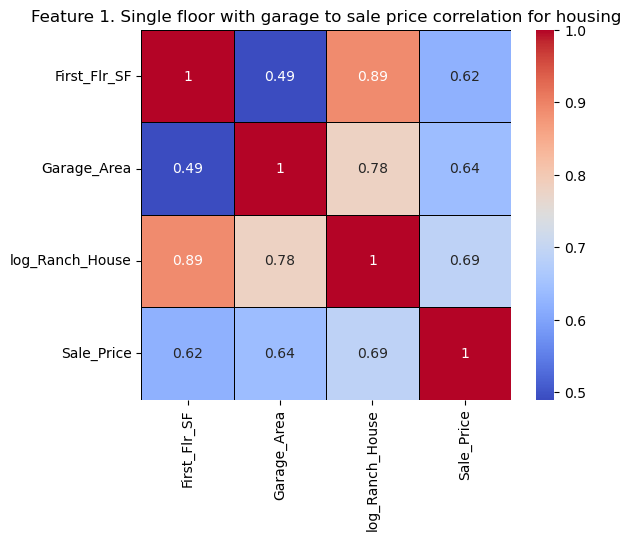


--------------
Ranch house style, single floor with garage to log sale price correlation
--------------
First_Flr_SF       0.60
Garage_Area        0.65
log_Ranch_House    0.72
log_Sale_Price     1.00
Name: log_Sale_Price, dtype: float64



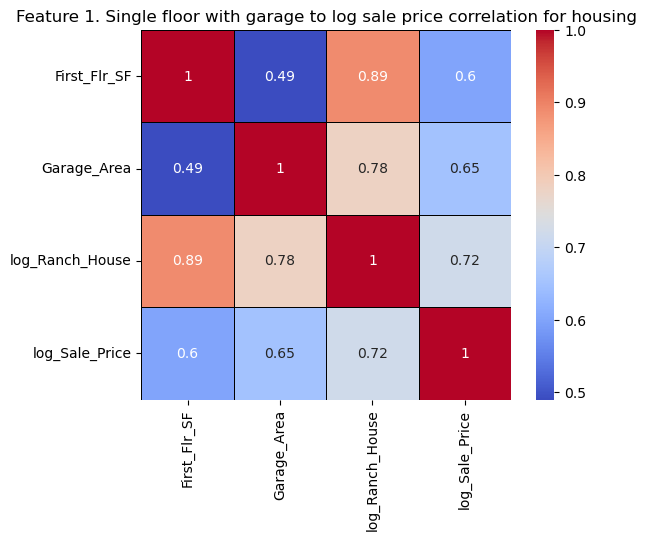


--------------
Expensive neighborhood 5 rooms and 3 car garages to sale price correlation
--------------
TotRms_AbvGr                    0.50
Garage_Cars                     0.65
expensive_property              0.58
exp_neig_5_rm_and_3_car_garg    0.65
Sale_Price                      1.00
Name: Sale_Price, dtype: float64



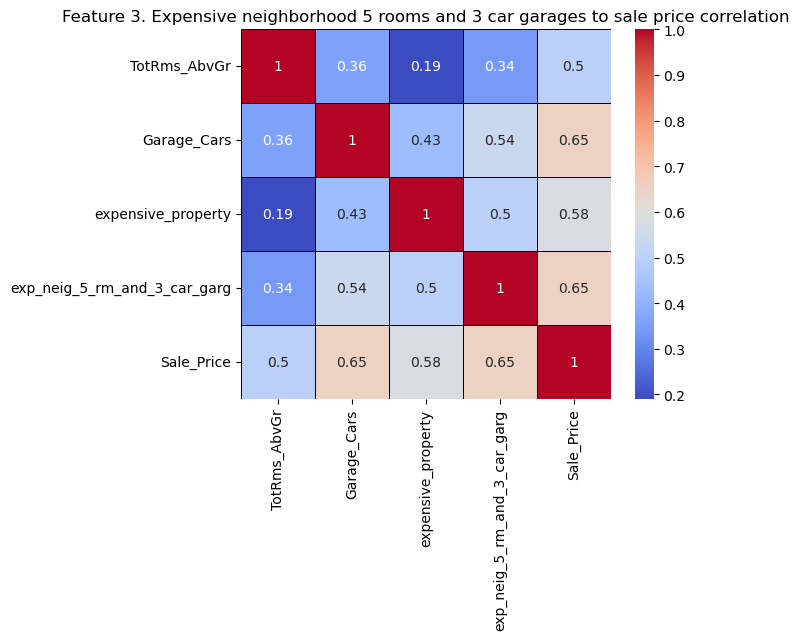


--------------
Expensive neighborhood 5 rooms and 3 car garages to log sale price correlation
--------------
TotRms_AbvGr                    0.49
Garage_Cars                     0.67
expensive_property              0.58
exp_neig_5_rm_and_3_car_garg    0.55
log_Sale_Price                  1.00
Name: log_Sale_Price, dtype: float64



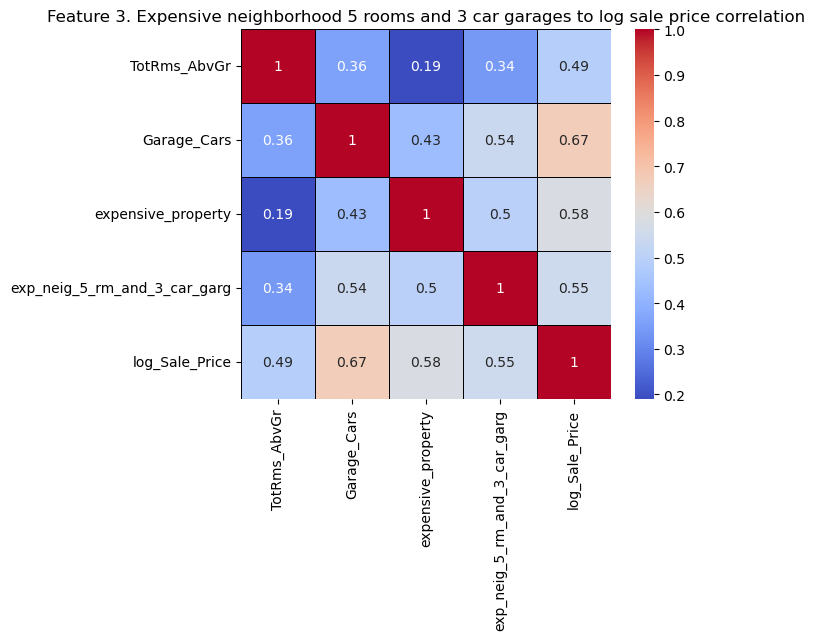

In [51]:
########################### LOAD MODULES #################################
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


########################## OUTPUT SETTING ################################
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

############################ LOAD FILE ###################################
# specifying file name
file = './__datasets/Ames Housing Dataset.xlsx'

# reading the file into Python
housing = pd.read_excel(io = file)

########################### PREPARE DATA #################################
# replace with 0 to all the missing values
# instantiating an imputation value
fill = 0
# imputing 'Mas Vnr Area'
housing['Mas_Vnr_Area'] = housing['Mas_Vnr_Area'].fillna(fill)
# Total_Bsmt_SF
housing['Total_Bsmt_SF'] = housing['Total_Bsmt_SF'].fillna(fill)
# Garage_Cars
housing['Garage_Cars'] = housing['Garage_Cars'].fillna(fill)
# Garage_Area
housing['Garage_Area'] = housing['Garage_Area'].fillna(fill)

# check missing values in housing
housing.isnull().any().any()


####################### LOG. TRANSFORMATION #############################
# Log. Tranformation for "Sale_Price"
housing['log_Sale_Price'] = np.log(housing['Sale_Price'])

############################ FEATURE 1 ##################################
# Feature 1. Total square feet correlation with sale price and log sale price

#### CORRELATION WITH SALE_PRICE ###
# Add basement, first floor, second floor (if any) into a total square feet
housing['Total_SF'] = housing['Total_Bsmt_SF'] + \
                      housing['First_Flr_SF'] + \
                      housing['Second_Flr_SF']

# Log. Tranformation for the total square feet
# from skewness 1.51 to -0.37
housing['log_Total_SF'] = np.log(housing['Total_SF'])

# execute pearson correlation to basement, first floor, second floor,
# total square feet, log total square feet and sale price.
feature_1_corr = housing.loc[:, ["Total_Bsmt_SF",
                          "First_Flr_SF",
                          "Second_Flr_SF",
                          "log_Total_SF",
                          "Sale_Price"]].corr(method= 'pearson')\
                          .round(decimals=2)

#### CORRELATION WITH LOG SALE_PRICE ###
# Add basement, first floor, second floor (if any) into a total square feet
housing['Total_SF'] = housing['Total_Bsmt_SF'] + \
                      housing['First_Flr_SF'] + \
                      housing['Second_Flr_SF']

# Log. Tranformation for the total square feet
# from skewness 1.51 to -0.37
housing['log_Total_SF'] = np.log(housing['Total_SF'])




############################ FEATURE 2 ##################################
# Feature 2. Ranch house correlation with sale price and log sale price

# Ranch house is defined by a single floor with attached garage.

#### CORRELATION WITH SALE_PRICE ###

# Sum first floor and garage to form ranch house characteristic
housing['Ranch_House'] = (housing['First_Flr_SF'] +\
                          housing['Garage_Area'])

# Log. Tranformation for the ranch house style
# from skewness 1.09 to -0.21
housing['log_Ranch_House'] = np.log(housing['Ranch_House'])



#### CORRELATION WITH LOG SALE_PRICE ###

# Log. Tranformation for the ranch house style
# from skewness 1.09 to -0.21
housing['log_Ranch_House'] = np.log(housing['Ranch_House'])




############################ FEATURE 3 ##################################
# Feature 3. Expensive Neighborhood with particular home feature
# correlation with sale price and log sale price

# We hypothesize that NoRidge, NridgHt, StoneBr, Somerst, CollgCr, Timber,
# and Crawfor are expensive neighborhood. We set our last feature into the
# house in these neighborhoods with more than or equal 5 rooms and 3 car
# garages has positive impact to sale price.

#### CORRELATION WITH SALE_PRICE ###

# define binary variable for expensive neighborhood, 1 for true
housing['expensive_property'] = 0
# define specific room characteristic binary variable, 1 for true
housing["exp_neig_5_rm_and_3_car_garg"] = 0

# hypothesis expensive neighborhoods list
expensive_neighborhood = ['NoRidge', 
                          'NridgHt', 
                          'StoneBr',
                          'Somerst', 
                          'CollgCr',
                          'Timber',
                          'Crawfor']

# use for loop to convert categorical column Neighborhood into binary
for index, value in housing.iterrows():
    if housing.loc[index, 'Neighborhood'] in expensive_neighborhood:
        housing.loc[index, 'expensive_property'] = 1
        
# iterating over each original column to check condition, if the condition
# are met, store the binary column to 1 as true.
for index, value in housing.iterrows():

    # set specific conditions for expensive neighborhoods
    if housing.loc[index, 'TotRms_AbvGr'] > 5 and \
        housing.loc[index, 'expensive_property'] == 1 and\
        housing.loc[index, 'Garage_Cars'] == 3.0 :
        # if above three conditions are met, set the varialbe into true
        housing.loc[index, 'exp_neig_5_rm_and_3_car_garg'] = 1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop a correlation matrix or a heatmap to show the linear relationships between your five new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).


Feature 1. Total square feet correlation with sale price correlation
--------------
Total_Bsmt_SF    0.63
First_Flr_SF     0.62
Second_Flr_SF    0.27
log_Total_SF     0.76
Sale_Price       1.00
Name: Sale_Price, dtype: float64



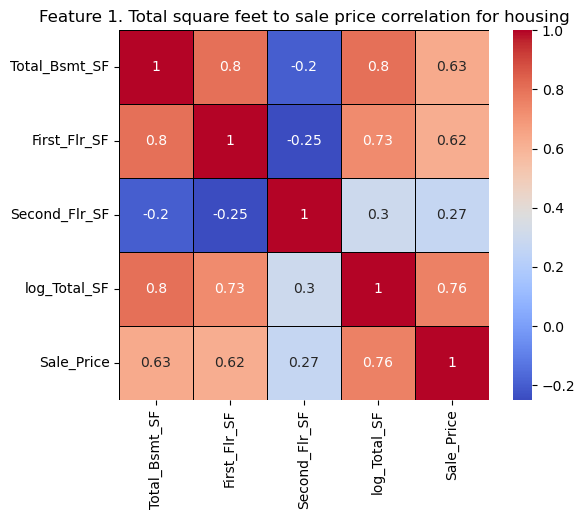


Feature 1. Total square feet correlation with log sale price correlation
--------------
Total_Bsmt_SF     0.63
First_Flr_SF      0.60
Second_Flr_SF     0.27
log_Total_SF      0.81
log_Sale_Price    1.00
Name: log_Sale_Price, dtype: float64



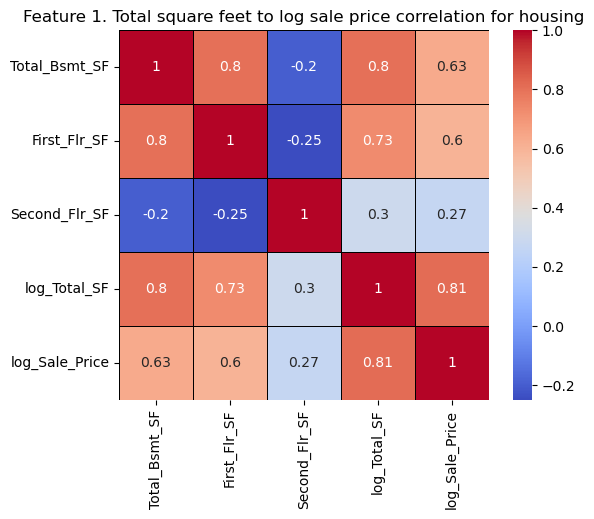


--------------
Ranch house style, single floor with garage to sale price correlation
--------------
First_Flr_SF       0.62
Garage_Area        0.64
log_Ranch_House    0.69
Sale_Price         1.00
Name: Sale_Price, dtype: float64



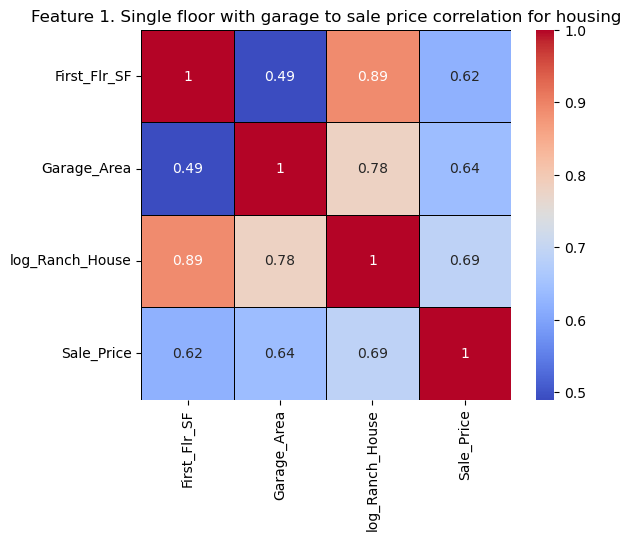


--------------
Ranch house style, single floor with garage to log sale price correlation
--------------
First_Flr_SF       0.60
Garage_Area        0.65
log_Ranch_House    0.72
log_Sale_Price     1.00
Name: log_Sale_Price, dtype: float64



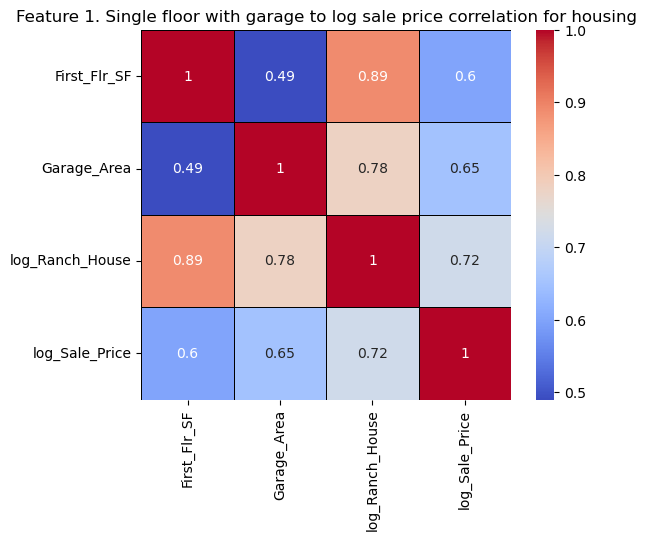


--------------
Expensive neighborhood 5 rooms and 3 car garages to sale price correlation
--------------
TotRms_AbvGr                    0.50
Garage_Cars                     0.65
expensive_property              0.58
exp_neig_5_rm_and_3_car_garg    0.65
Sale_Price                      1.00
Name: Sale_Price, dtype: float64



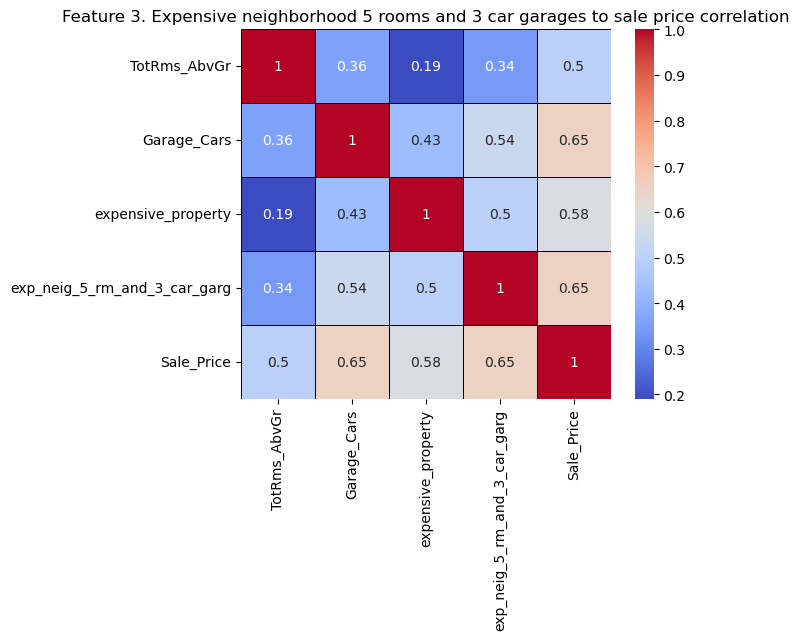


--------------
Expensive neighborhood 5 rooms and 3 car garages to log sale price correlation
--------------
TotRms_AbvGr                    0.49
Garage_Cars                     0.67
expensive_property              0.58
exp_neig_5_rm_and_3_car_garg    0.55
log_Sale_Price                  1.00
Name: log_Sale_Price, dtype: float64



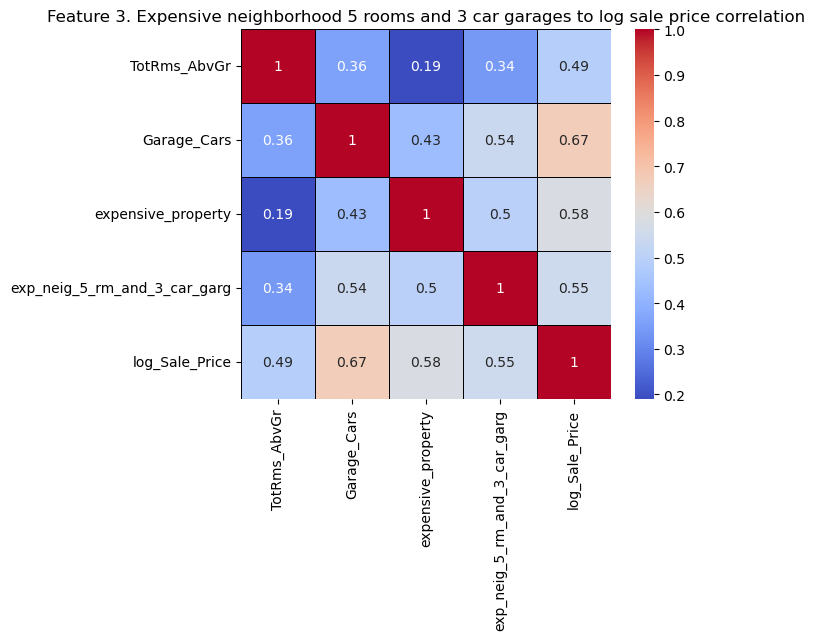

In [53]:
# code here

############################ FEATURE 1 ##################################
### Feature 1. correlation result with sale price
# printing correlation result
print(f"""
Feature 1. Total square feet correlation with sale price correlation
--------------
{feature_1_corr["Sale_Price"]}
""")

### Feature 1. correlation heatmap with sale price
# create heatmap using sf_corr correlation data
ax = plt.subplot()

sns.heatmap(data= feature_1_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor= 'black',
            linewidths= 0.5)

plt.title(label = "Feature 1. Total square feet to sale price "
                  "correlation for housing")
plt.show(block = True)


### Feature 1. correlation result with log sale price
# execute pearson correlation to basement, first floor, second floor,
# total square feet, log total square feet and log sale price.
feature_1_corr_log = housing.loc[:, ["Total_Bsmt_SF",
                          "First_Flr_SF",
                          "Second_Flr_SF",
                          "log_Total_SF",
                          "log_Sale_Price"]].corr(method= 'pearson')\
                          .round(decimals=2)

### Feature 1. correlation heatmap with log sale price
# printing correlation result
print(f"""
Feature 1. Total square feet correlation with log sale price correlation
--------------
{feature_1_corr_log["log_Sale_Price"]}
""")

# create heatmap using sf_corr correlation data
ax = plt.subplot()

sns.heatmap(data= feature_1_corr_log,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor= 'black',
            linewidths= 0.5)

plt.title(label = "Feature 1. Total square feet to log sale price "
                  "correlation for housing")
plt.show(block = True)

############################ FEATURE 2 ##################################
### Feature 2. correlation result with sale price
# execute pearson correlation to first floor, garage, log ranch house,
# and sale price.
feature_2_corr = housing.loc[:, ["First_Flr_SF",
                          "Garage_Area",
                          "log_Ranch_House", 
                          "Sale_Price"]].corr(method= 'pearson')\
                          .round(decimals = 2)

# printing correlation result
print(f"""
--------------
Feature 2. Ranch house style, single floor with garage to sale price correlation
--------------
{feature_2_corr["Sale_Price"]}
""")

### Feature 2. correlation heatmap with sale price
# create heatmap using sf_corr correlation data
ax = plt.subplot()

sns.heatmap(data= feature_2_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor= 'black',
            linewidths= 0.5)

plt.title(label = "Feature 2. Single floor with garage to sale price "
                  "correlation for housing")
plt.show(block = True)


### Feature 2. correlation result with log sale price
# execute pearson correlation to first floor, garage, log ranch house,
# and log sale price.
feature_2_corr_log = housing.loc[:, ["First_Flr_SF",
                          "Garage_Area",
                          "log_Ranch_House", 
                          "log_Sale_Price"]].corr(method= 'pearson')\
                          .round(decimals = 2)

# printing correlation result
print(f"""
--------------
Feature 2. Ranch house style, single floor with garage to log sale price correlation
--------------
{feature_2_corr_log["log_Sale_Price"]}
""")

### Feature 2. correlation heatmap with log sale price
# create heatmap using sf_corr correlation data
ax = plt.subplot()

sns.heatmap(data= feature_2_corr_log,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor= 'black',
            linewidths= 0.5)

plt.title(label = "Feature 2. Single floor with garage to log sale price "
                  "correlation for housing")
plt.show(block = True)

############################ FEATURE 3 ##################################
### Feature 3. correlation result with sale price
# execute pearson correlation to total room above ground, car garage,
# expensive neighborhoods, specific house variable, and sale price.
feature_3_corr = housing.loc[:, ['TotRms_AbvGr',"Garage_Cars" ,
                          "expensive_property", 
                          "exp_neig_5_rm_and_3_car_garg",
                          "Sale_Price"]].corr(method= 'pearson')\
                          .round(decimals=2)

# printing correlation result
print(f"""
--------------
Feature 3. Expensive neighborhood 5 rooms and 3 car garages to sale price correlation
--------------
{feature_3_corr["Sale_Price"]}
""")

### Feature 3. correlation heatmap with sale price
# create heatmap using sf_corr correlation data
ax = plt.subplot()

sns.heatmap(data= feature_3_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor= 'black',
            linewidths= 0.5)

plt.title(label = "Feature 3. Expensive neighborhood 5 rooms and 3 car "
                  "garages to sale price correlation")
plt.show(block = True)


### Feature 3. correlation result with log sale price
# execute pearson correlation to total room above ground, car garage,
# expensive neighborhoods, specific house variable, and log sale price.
feature_3_corr_log = housing.loc[:, ['TotRms_AbvGr',"Garage_Cars" ,
                          "expensive_property", 
                          "exp_neig_5_rm_and_3_car_garg",
                          "log_Sale_Price"]].corr(method= 'pearson')\
                          .round(decimals=2)

# printing correlation result
print(f"""
--------------
Feature 3. Expensive neighborhood 5 rooms and 3 car garages to log sale price correlation
--------------
{feature_3_corr_log["log_Sale_Price"]}
""")

### Feature 3. correlation heatmap with log sale price
# create heatmap using sf_corr correlation data
ax = plt.subplot()

sns.heatmap(data= feature_3_corr_log,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor= 'black',
            linewidths= 0.5)

plt.title(label = "Feature 3. Expensive neighborhood 5 rooms and 3 car "
                  "garages to log sale price correlation")
plt.show(block = True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
Did your engineered features have the effect that was expected? Explain in 1-2 sentences for each engineered feature.

In Feature 1: The total square feet has significant impact to sale price and log sale price. This collective variable has a stronger correlation compare to individual (basement, first floor, and second floor) with the sale price as well as log sale price.

In Feature 2:  The Seaborn heatmap displays a correlation value of 0.72 between the sale price of traditional ranch homes in Iowa. This strong correlation suggests that traditional ranch homes may be highly valued by home buyers in Iowa.

In Feature 3: According to the correlation coefficients, the feature "Five Rooms With Three Car Garage" positively correlates with the Sale Price of homes in a moderately strong way. A five-room home with a three-car garage correlates positively with higher home values, as shown by the correlation coefficient of 0.65.



